## Batch Normalization Example
Ref - https://towardsdatascience.com/batch-normalization-in-practice-an-example-with-keras-and-tensorflow-2-0-b1ec28bde96f

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

### Parameters

In [2]:
TEST_SIZE = 0.2
BATCH_SIZE = 40
EPOCH = 200
VAL_SIZE = 0.25

### Load Data

In [3]:
iris = load_iris()

### Data Preprocessing

In [4]:
# Extract Feature Data
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df.astype(np.float)

In [5]:
# Extract Label Data (Label Index 0 ~ 2 => Label String)
df['label'] = iris.target
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [6]:
# Label => One-Hot Encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)

df.drop(['label'], axis=1, inplace=True)

In [7]:
# DataFrame => Numpy Array
X = np.asarray(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
y = np.asarray(df[['label_setosa', 'label_versicolor', 'label_virginica']])

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)

### Create Model

In [9]:
# Model without BN
model = Sequential()
model.add(Dense(64, input_shape=(4, ), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [10]:
# Model with BN
model_bn = Sequential()
model_bn.add(Dense(64, input_shape=(4, ), activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dense(128, activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dense(128, activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dense(64, activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dense(64, activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dense(3, activation='softmax'))

In [11]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train Model

In [12]:
h = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCH, validation_split=VAL_SIZE)

Epoch 1/200
3/3 [==============================] - 0s 52ms/step - loss: 1.1109 - accuracy: 0.4000 - val_loss: 1.0487 - val_accuracy: 0.7333
Epoch 2/200
3/3 [==============================] - 0s 12ms/step - loss: 1.0500 - accuracy: 0.6889 - val_loss: 1.0019 - val_accuracy: 0.7333
Epoch 3/200
3/3 [==============================] - 0s 13ms/step - loss: 0.9920 - accuracy: 0.7111 - val_loss: 0.9560 - val_accuracy: 0.8667
Epoch 4/200
3/3 [==============================] - 0s 12ms/step - loss: 0.9325 - accuracy: 0.8889 - val_loss: 0.8911 - val_accuracy: 0.9667
Epoch 5/200
3/3 [==============================] - 0s 13ms/step - loss: 0.8610 - accuracy: 0.8778 - val_loss: 0.8234 - val_accuracy: 0.7000
Epoch 6/200
3/3 [==============================] - 0s 12ms/step - loss: 0.7735 - accuracy: 0.7778 - val_loss: 0.7309 - val_accuracy: 0.7667
Epoch 7/200
3/3 [==============================] - 0s 13ms/step - loss: 0.6702 - accuracy: 0.8667 - val_loss: 0.6211 - val_accuracy: 0.9667
Epoch 8/200
3/3 [===

3/3 [==============================] - 0s 12ms/step - loss: 0.0864 - accuracy: 0.9778 - val_loss: 0.0406 - val_accuracy: 1.0000
Epoch 60/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0598 - accuracy: 0.9889 - val_loss: 0.0610 - val_accuracy: 0.9333
Epoch 61/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0674 - accuracy: 0.9778 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 62/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0625 - accuracy: 0.9778 - val_loss: 0.0442 - val_accuracy: 1.0000
Epoch 63/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0651 - accuracy: 0.9778 - val_loss: 0.0480 - val_accuracy: 1.0000
Epoch 64/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0536 - accuracy: 0.9889 - val_loss: 0.0385 - val_accuracy: 1.0000
Epoch 65/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0768 - accuracy: 0.9778 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 66/200
3/3 [========

3/3 [==============================] - 0s 12ms/step - loss: 0.0873 - accuracy: 0.9667 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 118/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0609 - accuracy: 0.9667 - val_loss: 0.1385 - val_accuracy: 0.9333
Epoch 119/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0746 - accuracy: 0.9667 - val_loss: 0.0399 - val_accuracy: 0.9667
Epoch 120/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0464 - accuracy: 0.9889 - val_loss: 0.0408 - val_accuracy: 0.9667
Epoch 121/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0421 - accuracy: 0.9778 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 122/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0508 - accuracy: 0.9778 - val_loss: 0.0306 - val_accuracy: 1.0000
Epoch 123/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0460 - accuracy: 0.9778 - val_loss: 0.0701 - val_accuracy: 0.9667
Epoch 124/200
3/3 [=

Epoch 175/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0511 - accuracy: 0.9889 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 176/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0955 - accuracy: 0.9667 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 177/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0685 - accuracy: 0.9778 - val_loss: 0.1260 - val_accuracy: 0.9333
Epoch 178/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0613 - accuracy: 0.9778 - val_loss: 0.1090 - val_accuracy: 0.9333
Epoch 179/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0414 - accuracy: 0.9889 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 180/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0625 - accuracy: 0.9778 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 181/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0524 - accuracy: 0.9778 - val_loss: 0.0912 - val_accuracy: 0.9333
Epoch 

In [13]:
h_bn = model_bn.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCH, validation_split=VAL_SIZE)

Epoch 1/200
3/3 [==============================] - 0s 60ms/step - loss: 1.2934 - accuracy: 0.4667 - val_loss: 1.0876 - val_accuracy: 0.2667
Epoch 2/200
3/3 [==============================] - 0s 13ms/step - loss: 0.2779 - accuracy: 0.9111 - val_loss: 1.0814 - val_accuracy: 0.2667
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1593 - accuracy: 0.9667 - val_loss: 1.0862 - val_accuracy: 0.2667
Epoch 4/200
3/3 [==============================] - 0s 13ms/step - loss: 0.1326 - accuracy: 0.9667 - val_loss: 1.0741 - val_accuracy: 0.2667
Epoch 5/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1038 - accuracy: 0.9667 - val_loss: 1.0443 - val_accuracy: 0.3000
Epoch 6/200
3/3 [==============================] - 0s 13ms/step - loss: 0.1073 - accuracy: 0.9778 - val_loss: 1.0200 - val_accuracy: 0.3333
Epoch 7/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0447 - accuracy: 0.9778 - val_loss: 0.9987 - val_accuracy: 0.3333
Epoch 8/200
3/3 [===

3/3 [==============================] - 0s 13ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.4796 - val_accuracy: 0.9000
Epoch 60/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0292 - accuracy: 0.9889 - val_loss: 0.4472 - val_accuracy: 0.9333
Epoch 61/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.4176 - val_accuracy: 0.9333
Epoch 62/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.3956 - val_accuracy: 0.9667
Epoch 63/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0233 - accuracy: 0.9889 - val_loss: 0.3825 - val_accuracy: 0.9667
Epoch 64/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.3779 - val_accuracy: 0.9667
Epoch 65/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.3755 - val_accuracy: 0.9667
Epoch 66/200
3/3 [========

3/3 [==============================] - 0s 13ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 1.0000
Epoch 118/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0259 - accuracy: 0.9889 - val_loss: 0.0647 - val_accuracy: 1.0000
Epoch 119/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0283 - accuracy: 0.9889 - val_loss: 0.0768 - val_accuracy: 0.9667
Epoch 120/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0828 - val_accuracy: 0.9667
Epoch 121/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.0731 - val_accuracy: 0.9667
Epoch 122/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.0925 - val_accuracy: 0.9667
Epoch 123/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0701 - accuracy: 0.9889 - val_loss: 0.1468 - val_accuracy: 0.9333
Epoch 124/200
3/3 [=

Epoch 175/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0456 - val_accuracy: 1.0000
Epoch 176/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0481 - val_accuracy: 0.9667
Epoch 177/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0667 - accuracy: 0.9889 - val_loss: 0.0571 - val_accuracy: 0.9667
Epoch 178/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0566 - accuracy: 0.9889 - val_loss: 0.0949 - val_accuracy: 0.9667
Epoch 179/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.1305 - val_accuracy: 0.9333
Epoch 180/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0272 - accuracy: 0.9889 - val_loss: 0.1234 - val_accuracy: 0.9667
Epoch 181/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.1162 - val_accuracy: 0.9667
Epoch 

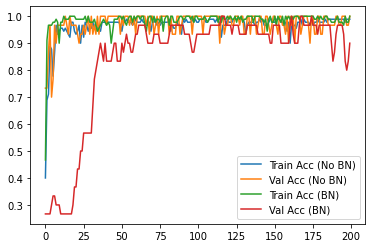

In [14]:
plt.plot(h.history['accuracy'], label='Train Acc (No BN)')
plt.plot(h.history['val_accuracy'], label='Val Acc (No BN)')
plt.plot(h_bn.history['accuracy'], label='Train Acc (BN)')
plt.plot(h_bn.history['val_accuracy'], label='Val Acc (BN)')
plt.legend()

### Evaluation

In [15]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 336us/step - loss: 0.3348 - accuracy: 0.9000


[0.3347993791103363, 0.8999999761581421]

In [16]:
model_bn.evaluate(X_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.8519 - accuracy: 0.7667


[0.8519026637077332, 0.7666666507720947]